In [1]:
# Book_ Machine learning in Production by Andrew Kelleher, ISBN: 978-0-13-411654-9

# p.42
import pandas as pd
import numpy as np

# Generate the data
X = pd.DataFrame(np.random.normal(size=(100,100)), columns=['X_{}'.format(i+1) for i in range(100)])
X['Y'] = X['X_1'] + np.random.normal(size=100)

In [3]:
print(X.head())

        X_1       X_2       X_3       X_4       X_5       X_6       X_7  \
0  1.188147  0.286686  0.093513 -0.092322 -0.615475  0.572034  1.461605   
1  0.344539  0.544052 -0.658764  0.597445  0.204703  0.062767 -2.357502   
2 -0.920206 -1.585883  0.133780 -0.321015  0.652146  1.362960  0.117360   
3  2.328907 -0.843965 -0.996738  2.439595  0.601552  0.994133  0.017642   
4 -1.336473 -1.435450  0.355490 -0.150969 -0.105128 -1.103096  1.238474   

        X_8       X_9      X_10  ...      X_92      X_93      X_94      X_95  \
0 -1.624589 -0.172379 -2.078786  ...  0.649712  0.616962 -0.050283 -0.140651   
1  1.221286 -0.343381 -0.489968  ... -0.667982  0.396135 -0.503462 -0.363363   
2  1.136589  0.882519 -0.583509  ... -0.201781 -1.396290  0.227527  1.172016   
3  0.025766 -0.074367 -0.050565  ...  0.228788 -1.391408 -0.122764 -0.107932   
4  0.502123 -0.096174 -0.000535  ...  0.576213  1.487181  0.209055  0.331155   

       X_96      X_97      X_98      X_99     X_100         Y  
0  0

In [4]:
from scipy.stats import pearsonr
alpha = 0.05
n = len(X.columns) - 1
bonferroni_alpha = alpha/n
for xi in X.columns:
    r, p_value = pearsonr(X[xi], X['Y'])
    if p_value < bonferroni_alpha:
        print(xi, r, p_value, '***')
    elif p_value < alpha:
        print(xi, r, p_value)

X_1 0.7724587451977605 4.904935726511866e-21 ***
X_3 -0.2259999990461281 0.023764036113808035
X_26 -0.2297938498462639 0.02145292830179515
X_36 0.3668519879723147 0.00017391779293291474 ***
X_47 -0.29368878873135146 0.0030203787529989494
X_83 -0.26533070954175625 0.007631621526186562
Y 1.0 0.0 ***


In [26]:
# p.145 Bayesian Networks

import pandas as pd
import numpy as np
import pymc3 as pymc

%matplotlib inline

In [27]:
# generte some data
N = 10000
beta0 = -1
beta1 = 1.
beta2 = 2.

x1 = np.random.normal(size=N)
x2 = np.random.normal(size=N)
y = np.random.normal(beta1*x1 + beta2*x2 + beta0)

In [28]:
with pymc.Model() as model:
    b0 = pymc.Normal('beta_0', mu=0, sd=100.)
    b1 = pymc.Normal('beta_1', mu=0, sd=100.)
    b2 = pymc.Normal('beta_2', mu=0, sd=100.)
    error = pymc.Normal('epsilon', mu=0, sd=100.)
    
    y_out = b0 + b1*x1 + b2*x2
    y_var = pymc.Normal('y', mu=y_out, sd=error, observed=y)

In [30]:
with model:
    trace = pymc.sample(3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, beta_2, beta_1, beta_0]
Sampling 2 chains, 0 divergences: 100%|██████████| 7000/7000 [00:09<00:00, 771.72draws/s]
The acceptance probability does not match the target. It is 0.9306627977806375, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1046780828>,
      dtype=object)

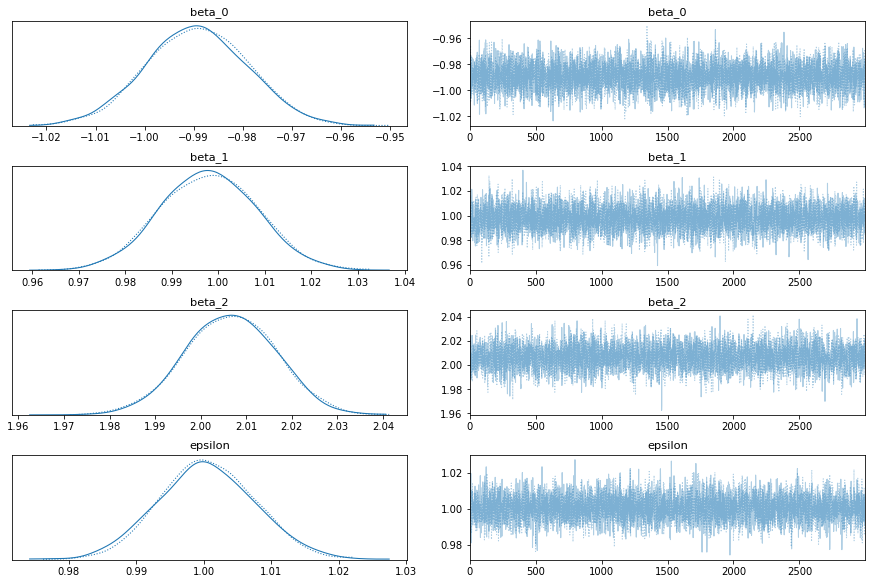

In [31]:
pymc.traceplot(trace)

In [32]:
# p.168 - Experiments in causal inference
import numpy as np
import pandas as pd

N = 1000

x = np.random.normal(size=N)
d = np.random.binomial(1.,0.5,size=N)
y = 3.*d + x + np.random.normal()

X = pd.DataFrame({'X':x, 'D':d, 'Y':y})

In [33]:
from statsmodels.api import OLS
X['intercept'] = 1
model = OLS(X['Y'], X[['D','intercept']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     2229.
Date:                Sun, 22 Mar 2020   Prob (F-statistic):          1.36e-256
Time:                        11:05:07   Log-Likelihood:                -1397.9
No. Observations:                1000   AIC:                             2800.
Df Residuals:                     998   BIC:                             2810.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
D              2.9271      0.062     47.216      0.000       2.805       3.049
intercept      0.1689      0.044      3.829      0.000       0.082       0.255
==============================================================================
Omnibus:                        0.579   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.749   Jarque-Bera (JB):                0.652
Skew:                          -0.051   Prob(JB):                        0.722
Kurtosis:                       2.927   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# p.152 Principal component analysis

import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

X = pd.DataFrame(np.random.multivariate_normal
                    ([2,2], [[1,.5],[.5,1]], size=5000),
                    columns = ['$x_1$', '$x_2$'])

In [43]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model = model.fit(X)

ValueError: Argument U has a size 2 which does not match 1, the number of arrow positions

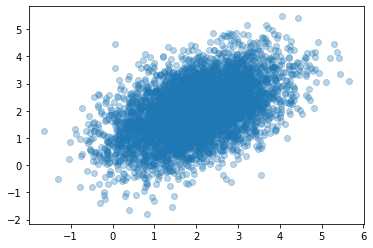

In [48]:
plt.scatter(X['$x_1$'],X['$x_2$'], alpha=0.3)

OX=[2]
OY=[2]
U=model.components_[:,0]
V=model.components_[:,1]

plt.quiver(OX,OY,U,V)

plt.show()

In [46]:
model.components_

array([[ 0.6984338 ,  0.71567466],
       [-0.71567466,  0.6984338 ]])

In [47]:
model.components_[:,0]

array([ 0.6984338 , -0.71567466])

ValueError: Argument U has a size 2 which does not match 1, the number of arrow positions

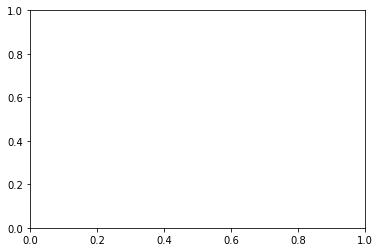

In [51]:
X=[0]
Y=[0]
U=[[1],[0]]
V=[[1],[1]]

plt.quiver(X,Y,U,V)
plt.show()